In [6]:
import pandas as pd
import numpy as np

1. Загрузите данные из файла в объект DataFrame, Добавьте заголовки к
столбцам: «index», «year», «month», «day», «min_t», «average_t», «max_t»,
«rainfall».

In [30]:
df = pd.read_table('wr88125.txt', sep=';', index_col='index', names=['index', 'year', 'month', 'day', 'min_t', 'average_t', 'max_t', 'rainfall'])
df.max_t = pd.to_numeric(df.max_t, errors='coerce')
df.min_t = pd.to_numeric(df.min_t, errors='coerce')
df.average_t = pd.to_numeric(df.average_t, errors='coerce')
df.rainfall = pd.to_numeric(df.rainfall, errors='coerce')
df

,year,month,day,min_t,average_t,max_t,rainfall
index,,,,,,,
29838,1960,1,1,-6.9,-5.4,-3.8,0.1
29838,1960,1,2,-14.4,-10.0,-6.7,0.5
29838,1960,1,3,-21.7,-19.7,-13.4,0.0
29838,1960,1,4,-24.9,-21.4,-16.9,0.0
29838,1960,1,5,-18.3,-8.0,-3.3,4.1
...,...,...,...,...,...,...,...
29838,2020,12,27,-41.7,-36.3,-32.8,0.0
29838,2020,12,28,-40.1,-34.2,-25.5,0.0
29838,2020,12,29,-28.2,-23.9,-18.6,0.0


2. Удалите столбец index.

In [31]:
df = df.reset_index(drop=True)
df

,year,month,day,min_t,average_t,max_t,rainfall
0,1960,1,1,-6.9,-5.4,-3.8,0.1
1,1960,1,2,-14.4,-10.0,-6.7,0.5
2,1960,1,3,-21.7,-19.7,-13.4,0.0
3,1960,1,4,-24.9,-21.4,-16.9,0.0
4,1960,1,5,-18.3,-8.0,-3.3,4.1
...,...,...,...,...,...,...,...
22276,2020,12,27,-41.7,-36.3,-32.8,0.0
22277,2020,12,28,-40.1,-34.2,-25.5,0.0
22278,2020,12,29,-28.2,-23.9,-18.6,0.0
22279,2020,12,30,-21.8,-13.6,-9.9,0.8


3. Используя метод info(), oтветьте на вопросы:
3.1. Есть ли в данных пропущенные значения? (да)
3.2. В каком столбце данных больше всего пропущенных значений? (max_t)

In [37]:
print(f'Кол-во пропущеных значений - {df.isna().sum()}')
df.info()


Кол-во пропущеных значений - year           0
month          0
day            0
min_t         26
average_t     26
max_t        564
rainfall      28
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22281 entries, 0 to 22280
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       22281 non-null  int64  
 1   month      22281 non-null  int64  
 2   day        22281 non-null  int64  
 3   min_t      22255 non-null  float64
 4   average_t  22255 non-null  float64
 5   max_t      21717 non-null  float64
 6   rainfall   22253 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


4. В данных за какой год больше всего пропусков?

In [41]:
nans = {}

for i in df.year.unique():
    nans[i] = df[df.year == i].isna().sum().sum()
print(f'{max(nans, key=nans.get)}')

1961


5. Объедините столбцы «Год», «Месяц» и «День» в один столбец «Дата» в
формате гггг-мм-дд (2000-01-20). Данные в новом столбце должны иметь
формат datetime;

In [42]:
df['date'] = df['year'].map(str) + '-' + df['month'].map(str) + '-' + df['day'].map(str)
df['date'] = pd.to_datetime(df['date'])
df.dtypes

year                  int64
month                 int64
day                   int64
min_t               float64
average_t           float64
max_t               float64
rainfall            float64
date         datetime64[ns]
dtype: object

6. Для каждого наблюдения рассчитайте размах температур (разность
максимальной и минимальной суточных температур) и количество
предшествующих ему дней без осадков (используйте циклы Python и
условный оператор)

In [43]:

df['range'] = df.max_t - df.min_t
df['days_without'] = 0
df.rainfall = pd.to_numeric(df.rainfall, errors='coerce')
for i in range(1, len(df)):
    if df['rainfall'][i-1] > 0:
        continue
    else:
        df['days_without'][i] = df['days_without'][i-1] + 1
        
df



/tmp/ipykernel_335/252092553.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_without'][i] = df['days_without'][i-1] + 1


,year,month,day,min_t,average_t,max_t,rainfall,date,range,days_without
0,1960,1,1,-6.9,-5.4,-3.8,0.1,1960-01-01,3.1,0
1,1960,1,2,-14.4,-10.0,-6.7,0.5,1960-01-02,7.7,0
2,1960,1,3,-21.7,-19.7,-13.4,0.0,1960-01-03,8.3,0
3,1960,1,4,-24.9,-21.4,-16.9,0.0,1960-01-04,8.0,1
4,1960,1,5,-18.3,-8.0,-3.3,4.1,1960-01-05,15.0,2
...,...,...,...,...,...,...,...,...,...,...
22276,2020,12,27,-41.7,-36.3,-32.8,0.0,2020-12-27,8.9,1
22277,2020,12,28,-40.1,-34.2,-25.5,0.0,2020-12-28,14.6,2
22278,2020,12,29,-28.2,-23.9,-18.6,0.0,2020-12-29,9.6,3
22279,2020,12,30,-21.8,-13.6,-9.9,0.8,2020-12-30,11.9,4


7. Определите самый длинный период засухи.

In [44]:
print(df.days_without.max())

27


8. Для каждого года вычислите среднегодовую температуру и общее количество 
осадков. Запишите результаты в объекты Series.

In [45]:
df.average_t = pd.to_numeric(df.average_t, errors='coerce')
temp = df.groupby(['year']).mean()
avg_t_for_year = pd.Series(data = temp['average_t'], index=range(1960, 2021))
avg_t_for_year

1960   -0.113934
1961    2.424384
1962    3.326849
1963    3.461264
1964    2.291803
          ...   
2016    3.021858
2017    3.512329
2018    1.607397
2019    3.413973
2020    4.776503
Name: average_t, Length: 61, dtype: float64

In [46]:
temp = df.groupby(['year']).sum()
full_rainfall = pd.Series(data = temp['rainfall'], index=range(1960, 2021))
full_rainfall

1960    472.7
1961    517.8
1962    368.7
1963    430.3
1964    425.3
        ...  
2016    488.8
2017    498.2
2018    442.4
2019    375.4
2020    437.2
Name: rainfall, Length: 61, dtype: float64

8.1. Какой год можно считать самым теплым? Какой самым холодным?
8.2. В какой год выпало больше всего осадков? В какой меньше всего?

In [47]:
print(avg_t_for_year[avg_t_for_year == avg_t_for_year.max()].index[0], ' - самый теплый год')
print(avg_t_for_year[avg_t_for_year == avg_t_for_year.min()].index[0], ' - самый холодный год')
print(full_rainfall[full_rainfall == full_rainfall.max()].index[0], ' - год с наибольшим количеством осадков')
print(full_rainfall[full_rainfall == full_rainfall.min()].index[0], ' - год с наименьшим количеством осадков')

2020  - самый теплый год
1969  - самый холодный год
1970  - год с наибольшим количеством осадков
1973  - год с наименьшим количеством осадков


Используя запись имя_серии.plot() вы можете построить график и 
посмотреть как изменялась температура. С помощью имя_серии. .plot.bar() 
можно отобразить на столбиковой диаграмме количество осадков, 
выпавших в каждый год.

<AxesSubplot:>

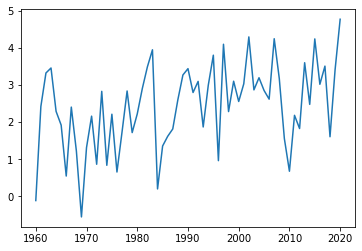

In [48]:
avg_t_for_year.plot()

<AxesSubplot:>

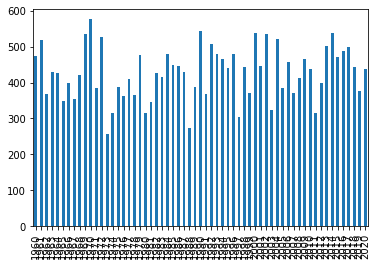

In [49]:
full_rainfall.plot.bar()

9. Выведете наблюдения, удовлетворяющие условиям:
9.1. Средняя температура воздуха ниже -30 оС (для некоторых регионов 
можно использовать -10 оС, -35оС, -40 оС).
9.2. Средняя температура воздуха выше 27
оС и количество дней без осадков 
больше 3.

In [52]:
print(df[df['average_t'] < -30])


       year  month  day  min_t  average_t  max_t  rainfall       date  range  \
17     1960      1   18  -31.4      -31.2  -27.2       0.0 1960-01-18    4.2   
18     1960      1   19  -35.8      -33.2  -29.7       0.0 1960-01-19    6.1   
323    1960     11   19  -31.3      -30.1    NaN       0.8 1960-11-19    NaN   
361    1960     12   27  -34.2      -30.2    NaN       0.0 1960-12-27    NaN   
373    1961      1    8  -36.2      -34.5    NaN       0.0 1961-01-08    NaN   
...     ...    ...  ...    ...        ...    ...       ...        ...    ...   
21585  2019      2    5  -38.0      -32.0  -24.3       0.0 2019-02-05   13.7   
21588  2019      2    8  -38.3      -32.8  -24.8       0.0 2019-02-08   13.5   
22275  2020     12   26  -35.5      -31.6  -23.4       0.0 2020-12-26   12.1   
22276  2020     12   27  -41.7      -36.3  -32.8       0.0 2020-12-27    8.9   
22277  2020     12   28  -40.1      -34.2  -25.5       0.0 2020-12-28   14.6   

       days_without  
17               

In [53]:
print(df[(df['average_t'] > 27) & (df['days_without'] > 3)])

       year  month  day  min_t  average_t  max_t  rainfall       date  range  \
1270   1963      6   24   19.4       27.4   33.4       0.0 1963-06-24   14.0   
1993   1965      6   16   18.1       27.2   34.9       0.0 1965-06-16   16.8   
1994   1965      6   17   21.1       27.8   33.5       0.0 1965-06-17   12.4   
2020   1965      7   13   19.0       28.3   34.7       0.0 1965-07-13   15.7   
2029   1965      7   22   19.8       27.3   35.0       0.0 1965-07-22   15.2   
3471   1969      7    3   21.4       27.1   33.2       0.0 1969-07-03   11.8   
3472   1969      7    4   22.1       28.9   35.5       0.0 1969-07-04   13.4   
3473   1969      7    5   23.2       27.9   34.2       0.0 1969-07-05   11.0   
5305   1974      7   11   16.9       27.8   37.9       0.0 1974-07-11   21.0   
6381   1977      6   21   19.5       27.2   32.9       0.0 1977-06-21   13.4   
8601   1983      7   20   20.4       27.2   33.7       0.0 1983-07-20   13.3   
10395  1988      6   17   19.4       28.